# Telecom Churn Case Study
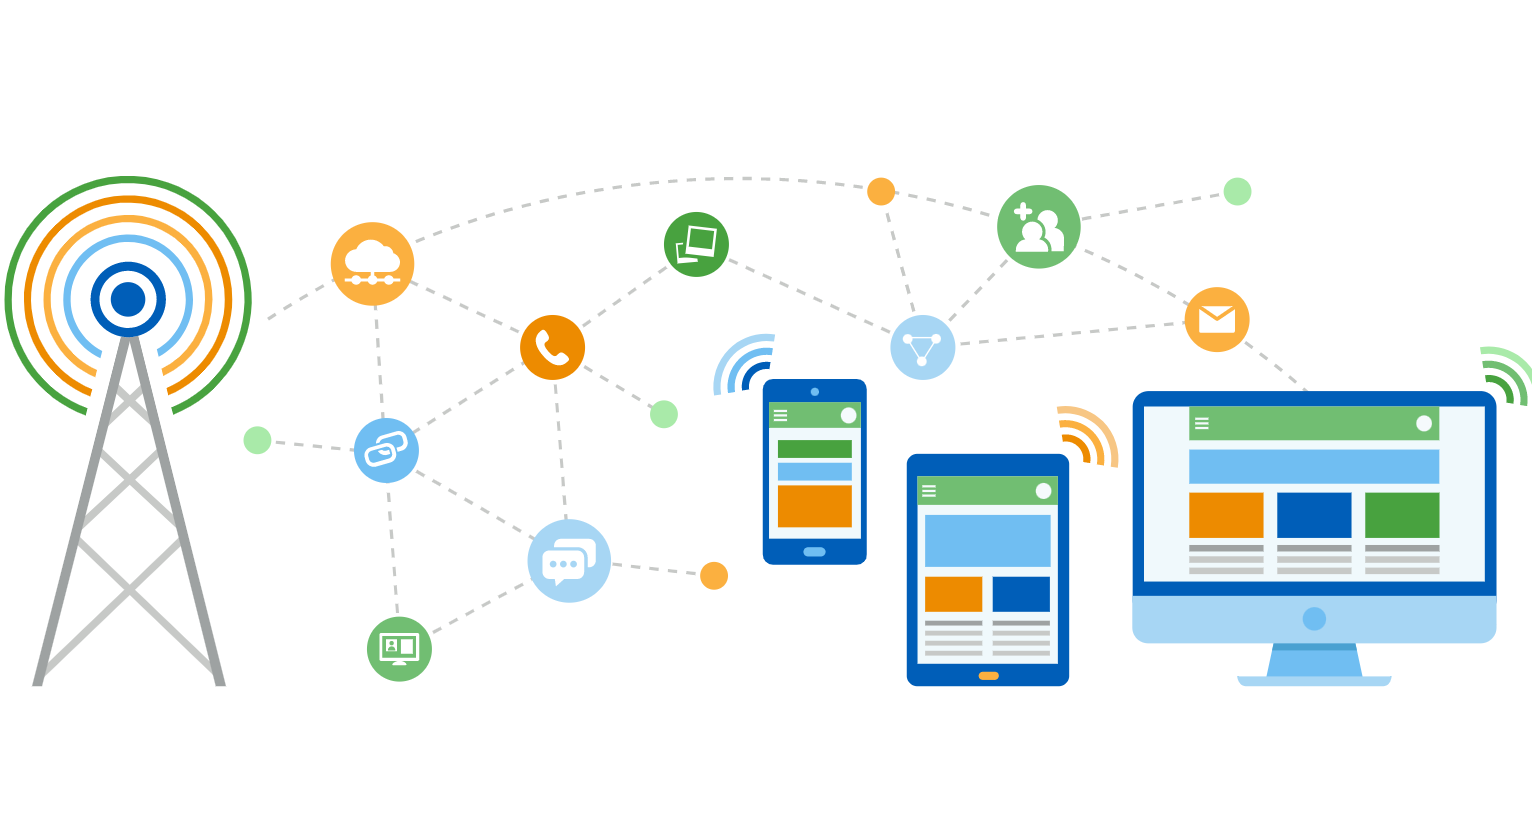

### Business problem overview

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

#### For many incumbent operators, retaining high profitable customers is the number one business goal.
#### To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.
##### In this project, we will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

#` we will follow these stepes to build the model
1. Preprocess data
2. Conduct appropriate exploratory analysis to extract useful insights 
3. Derive new features
4. Train a variety of models, tune model hyperparameters
5. Evaluate the models using appropriate evaluation metrics.
6. Finally, choose a model based on some evaluation metric.

## 1 . Preprocess Data
#### Import Liberarys

In [2]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
import hvplot.pandas

In [6]:
# To handle warnings
import warnings 
warnings.filterwarnings("ignore")

In [7]:
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

#### Read the Dataset

In [8]:
telecom=pd.read_csv("telecom_churn_data.csv")
telecom.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [9]:
telecom.shape

(99999, 226)

In [10]:
telecom.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

In [11]:
telecom.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
mean     132.395875    133.670805    133.018098    130.302327    197.935577   
std      297.207406    308.794148    308.951589    308.477668    316.851613   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.380000      6.660000      6.460000      5.330000     34.730000   
50%       34.310000     32.330000     32.360000     29.840000     96.310000   
75%      118.740000    115.595000    115.860000    112.130000    231.860000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  96140.000000  94621.000000  92254.000000   96062.000000   96140.000000   
mean     197.045133    196.574803    190.337222       9.950013       7.149898   
std      325.862803    327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       32.190000     31.630000     27.130000       0.000000       0.000000   
50%       91.735000     92.140000     87.290000       0.000000       0.000000   
75%      226.815000    228.260000    220.505000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   94621.000000   92254.000000   96062.000000   96140.000000   
mean        7.292981       6.343841      13.911337       9.818732   
std        68.402466      57.137537      71.443196      58.455762   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   94621.000000   92254.000000      96062.000000      96140.000000   
mean        9.971890       8.555519         47.100763         46.473010   
std        64.713221      58.438186        150.856393        155.318705   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.630000   
50%         0.000000       0.000000         11.910000         11.610000   
75%         0.000000       0.000000         40.960000         39.910000   
max      

In [12]:
# we have observed that last 4 values have different suffixes in names so we have to change it like aug_vbc_3g as vbc_3g_8,jul_vbc_3g as vbc_3g_7,jun_vbc_3g as vbc_3g_6,sep_vbc_3g as vbc_3g_9

In [13]:
telecom=telecom.rename(columns={"jun_vbc_3g":"vbc_3g_6","jul_vbc_3g":"vbc_3g_7","aug_vbc_3g":"vbc_3g_8","sep_vbc_3g":"vbc_3g_9"})

In [14]:
telecom.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

## Data Cleaning

In [15]:
telecom.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [16]:
null=round(100*(telecom.isnull().sum()/len(telecom)),2).sort_values(ascending=False)
null

Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
NumExpr defaulting to 8 threads.


arpu_3g_6                   74.85
night_pck_user_6            74.85
total_rech_data_6           74.85
arpu_2g_6                   74.85
max_rech_data_6             74.85
fb_user_6                   74.85
av_rech_amt_data_6          74.85
date_of_last_rech_data_6    74.85
count_rech_2g_6             74.85
count_rech_3g_6             74.85
date_of_last_rech_data_7    74.43
total_rech_data_7           74.43
fb_user_7                   74.43
max_rech_data_7             74.43
night_pck_user_7            74.43
count_rech_2g_7             74.43
av_rech_amt_data_7          74.43
arpu_2g_7                   74.43
count_rech_3g_7             74.43
arpu_3g_7                   74.43
total_rech_data_9           74.08
count_rech_3g_9             74.08
fb_user_9                   74.08
max_rech_data_9             74.08
arpu_3g_9                   74.08
date_of_last_rech_data_9    74.08
night_pck_user_9            74.08
arpu_2g_9                   74.08
count_rech_2g_9             74.08
av_rech_amt_da

In [17]:
count=0
for i in null:
    if i>70:
        count=count+1
        continue
    else:
        break
print("number of columns having 70% of null values:",count)

number of columns having 70% of null values: 40


In [18]:
total=len(null[null>0])
print("Total number columns having null values:",total)

Total number columns having null values: 166


1. Filter high-value customers

As mentioned above, you need to predict churn only for high-value customers. Define high-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

 

After filtering the high-value customers, you should get about 30k rows.

In [19]:
telecom[["total_rech_data_6","total_rech_data_7","av_rech_amt_data_6","av_rech_amt_data_7","total_rech_amt_6","total_rech_amt_7"]].isnull().sum()

total_rech_data_6     74846
total_rech_data_7     74428
av_rech_amt_data_6    74846
av_rech_amt_data_7    74428
total_rech_amt_6          0
total_rech_amt_7          0
dtype: int64

In [20]:
telecom[["total_rech_data_6","total_rech_data_7","av_rech_amt_data_6","av_rech_amt_data_7","total_rech_amt_6","total_rech_amt_7"]]=telecom[["total_rech_data_6","total_rech_data_7","av_rech_amt_data_6","av_rech_amt_data_7","total_rech_amt_6","total_rech_amt_7"]].fillna(0,axis=1)

In [21]:
telecom[['max_rech_data_6','max_rech_data_7','max_rech_data_8','count_rech_2g_6','count_rech_2g_7','count_rech_2g_8','count_rech_3g_6','count_rech_3g_7','count_rech_3g_8','arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_2g_6','arpu_2g_7','arpu_2g_8','night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8',"av_rech_amt_data_8","av_rech_amt_data_9","total_rech_data_8","total_rech_data_9","total_rech_amt_8","total_rech_amt_9"]]=telecom[['max_rech_data_6','max_rech_data_7','max_rech_data_8','count_rech_2g_6','count_rech_2g_7','count_rech_2g_8','count_rech_3g_6','count_rech_3g_7','count_rech_3g_8','arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_2g_6','arpu_2g_7','arpu_2g_8','night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8',"av_rech_amt_data_8","av_rech_amt_data_9","total_rech_data_8","total_rech_data_9","total_rech_amt_8","total_rech_amt_9"]].replace(np.nan, 0)

In [22]:
null=round(100*(telecom.isnull().sum()/len(telecom)),2).sort_values(ascending=False)
null

date_of_last_rech_data_6    74.85
date_of_last_rech_data_7    74.43
arpu_2g_9                   74.08
count_rech_3g_9             74.08
count_rech_2g_9             74.08
max_rech_data_9             74.08
arpu_3g_9                   74.08
date_of_last_rech_data_9    74.08
fb_user_9                   74.08
night_pck_user_9            74.08
date_of_last_rech_data_8    73.66
loc_og_t2c_mou_9             7.75
std_og_t2t_mou_9             7.75
std_ic_t2m_mou_9             7.75
loc_og_mou_9                 7.75
loc_og_t2f_mou_9             7.75
std_ic_t2f_mou_9             7.75
std_ic_t2o_mou_9             7.75
loc_og_t2m_mou_9             7.75
std_og_t2m_mou_9             7.75
std_ic_t2t_mou_9             7.75
isd_og_mou_9                 7.75
std_og_t2f_mou_9             7.75
loc_ic_mou_9                 7.75
std_og_t2c_mou_9             7.75
loc_ic_t2f_mou_9             7.75
std_og_mou_9                 7.75
loc_og_t2t_mou_9             7.75
loc_ic_t2m_mou_9             7.75
spl_og_mou_9  

In [23]:
#lets sum up all types of data recharge in the month
telecom['total_rech_num_data_6'] = (telecom['count_rech_2g_6']+telecom['count_rech_3g_6']).astype(int)
telecom['total_rech_num_data_7'] = (telecom['count_rech_2g_7']+telecom['count_rech_3g_7']).astype(int)
telecom['total_rech_num_data_8'] = (telecom['count_rech_2g_8']+telecom['count_rech_3g_8']).astype(int)

In [24]:
# total amount spent on recharging data
telecom['total_rech_amt_data_6'] = telecom['total_rech_num_data_6']*telecom['av_rech_amt_data_6']
telecom['total_rech_amt_data_7'] = telecom['total_rech_num_data_7']*telecom['av_rech_amt_data_7']
telecom['total_rech_amt_data_8'] = telecom['total_rech_num_data_8']*telecom['av_rech_amt_data_8']

In [25]:
#lets calculate total monthly recharge for data and call
telecom['total_month_rech_6'] = telecom['total_rech_amt_6']+telecom['total_rech_amt_data_6']
telecom['total_month_rech_7'] = telecom['total_rech_amt_7']+telecom['total_rech_amt_data_7']
telecom['total_month_rech_8'] = telecom['total_rech_amt_8']+telecom['total_rech_amt_data_8']

In [26]:
#high value customers based on the average recharge amount in the first two months(6,7) .(good phase)
hv=telecom[['total_month_rech_6','total_month_rech_7']].mean(axis=1).quantile(0.7)
hv

478.0

In [27]:
high_val_cust=telecom[telecom[['total_month_rech_6','total_month_rech_7']].mean(axis=1)>hv]

In [28]:
high_val_cust.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0      7000842753        109             0.0             0.0             0.0   
7      7000701601        109             0.0             0.0             0.0   
8      7001524846        109             0.0             0.0             0.0   
21     7002124215        109             0.0             0.0             0.0   
23     7000887461        109             0.0             0.0             0.0   

   last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0             6/30/2014            7/31/2014            8/31/2014   
7             6/30/2014            7/31/2014            8/31/2014   
8             6/30/2014            7/31/2014            8/31/2014   
21            6/30/2014            7/31/2014            8/31/2014   
23            6/30/2014            7/31/2014            8/31/2014   

   last_date_of_month_9    arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  \
0             9/30/2014   197.385   214.816   213.803   21.100          NaN   
7             9/30/2014  1069.180  1349.850  3171.480  500.000        57.84   
8             9/30/2014   378.721   492.223   137.362  166.787       413.69   
21            9/30/2014   514.453   597.753   637.760  578.596       102.41   
23            9/30/2014    74.350   193.897   366.966  811.480        48.96   

    onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0           NaN         0.00          NaN           NaN           NaN   
7         54.68        52.29          NaN        453.43        567.16   
8        351.03        35.08        33.46         94.66         80.63   
21       132.11        85.14       161.63        757.93        896.68   
23        50.66        33.58        15.74         85.41         89.36   

    offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0           0.00           NaN            NaN            NaN           0.00   
7         325.91           NaN          16.23          33.49          31.64   
8         136.48        108.71           0.00           0.00           0.00   
21        983.39        869.89           0.00           0.00           0.00   
23        205.89        111.88           0.00           0.00           0.00   

    roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0             NaN            NaN            NaN           0.00            NaN   
7             NaN          23.74          12.59          38.06            NaN   
8             0.0           0.00           0.00           0.00            0.0   
21            0.0           0.00           0.00           0.00            0.0   
23            0.0           0.00           0.00           0.00            0.0   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0                NaN               NaN              0.00               NaN   
7              51.39             31.38             40.28               NaN   
8             297.13            217.59             12.49             26.13   
21              4.48              6.16             23.34             29.98   
23             48.96             50.66             33.58             15.74   

    loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0                NaN               NaN              0.00               NaN   
7             308.63            447.38            162.28               NaN   
8              80.96             70.58             50.54             34.58   
21             91.81             87.93            104.81            107.54   
23             82.94             83.01            148.56             83.73   

    loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0                NaN               NaN              0.00               NaN   
7              62.13             55.14             53.23               NaN   
8               0.00              0.00              0.00    

In [29]:
high_val_cust.shape

(29953, 235)

In [30]:
print("number of observation after filtering high value customer",high_val_cust.shape[1])
print("number of features after filtering high value customer",high_val_cust.shape[0])

number of observation after filtering high value customer 235
number of features after filtering high value customer 29953


<b>After filtering the high-value customers, we get 29.9K rows.<b>

In [31]:
null1=round(100*(high_val_cust.isnull().sum()/len(high_val_cust)),2).sort_values(ascending=False)
null1

fb_user_9                   49.25
date_of_last_rech_data_9    49.25
count_rech_3g_9             49.25
arpu_3g_9                   49.25
count_rech_2g_9             49.25
arpu_2g_9                   49.25
max_rech_data_9             49.25
night_pck_user_9            49.25
date_of_last_rech_data_8    46.80
date_of_last_rech_data_6    44.11
date_of_last_rech_data_7    43.12
std_ic_mou_9                 6.34
roam_og_mou_9                6.34
std_og_mou_9                 6.34
std_ic_t2t_mou_9             6.34
std_ic_t2f_mou_9             6.34
loc_og_t2t_mou_9             6.34
spl_ic_mou_9                 6.34
loc_ic_mou_9                 6.34
std_og_t2c_mou_9             6.34
loc_og_t2m_mou_9             6.34
loc_og_t2c_mou_9             6.34
std_ic_t2o_mou_9             6.34
std_og_t2t_mou_9             6.34
loc_og_t2f_mou_9             6.34
loc_ic_t2f_mou_9             6.34
isd_ic_mou_9                 6.34
std_og_t2m_mou_9             6.34
roam_ic_mou_9                6.34
loc_og_mou_9  

In [32]:
count1=0
for i in null1:
    if i>49:
        count1=count1+1
        continue
    else:
        break
print("number of columns having 49% of null values:",count1)

number of columns having 49% of null values: 8


In [33]:
null1.loc[null1>49]

fb_user_9                   49.25
date_of_last_rech_data_9    49.25
count_rech_3g_9             49.25
arpu_3g_9                   49.25
count_rech_2g_9             49.25
arpu_2g_9                   49.25
max_rech_data_9             49.25
night_pck_user_9            49.25
dtype: float64

2. Tag churners and remove attributes of the churn phase

Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:

total_ic_mou_9

total_og_mou_9

vol_2g_mb_9

vol_3g_mb_9


After tagging churners, remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).

 

In [34]:
def Vol(x):
    if ((x['vol_3g_mb_9']==0) & (x['vol_2g_mb_9']==0.0) & (x['total_ic_mou_9']==0)  & (x['total_og_mou_9']==0)):
        return 1
    else:
        return 0


In [35]:
colm = ['vol_3g_mb_9', 'vol_2g_mb_9','total_ic_mou_9','total_og_mou_9']
high_val_cust['churn']=high_val_cust[colm].apply(Vol,axis=1)

In [36]:
print(len(high_val_cust[high_val_cust['churn']==1]))
print(len(high_val_cust[high_val_cust['churn']==0]))

2433
27520


In [37]:
colm1=high_val_cust.filter(regex=('_9')).columns
high_val_cust.drop(colm1,axis=1,inplace=True)

In [38]:
high_val_cust.shape

(29953, 181)

In [39]:
# we are droping Circle id as circle id value has only one value  and mobile no is not important
high_val_cust.drop(['circle_id','mobile_number'],axis=1,inplace=True)

In [40]:
c_date=high_val_cust.filter(regex=('date')).columns
c_date

Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8'],
      dtype='object')

In [41]:
high_val_cust['last_date_of_month_6']=pd.to_datetime(high_val_cust['last_date_of_month_6'],format="%m/%d/%Y")
high_val_cust['last_date_of_month_7']=pd.to_datetime(high_val_cust['last_date_of_month_7'],format="%m/%d/%Y")
high_val_cust['last_date_of_month_8']=pd.to_datetime(high_val_cust['last_date_of_month_8'],format="%m/%d/%Y")
high_val_cust['date_of_last_rech_6']=pd.to_datetime(high_val_cust['date_of_last_rech_6'],format="%m/%d/%Y")
high_val_cust['date_of_last_rech_7']=pd.to_datetime(high_val_cust['date_of_last_rech_7'],format="%m/%d/%Y")
high_val_cust['date_of_last_rech_8']=pd.to_datetime(high_val_cust['date_of_last_rech_8'],format="%m/%d/%Y")
high_val_cust['date_of_last_rech_data_6']=pd.to_datetime(high_val_cust['date_of_last_rech_data_6'],format="%m/%d/%Y")
high_val_cust['date_of_last_rech_data_7']=pd.to_datetime(high_val_cust['date_of_last_rech_data_7'],format="%m/%d/%Y")
high_val_cust['date_of_last_rech_data_8']=pd.to_datetime(high_val_cust['date_of_last_rech_data_8'],format="%m/%d/%Y")


In [42]:
null2=round(100*(high_val_cust.isnull().sum()/len(high_val_cust)),2)
null2[null2>0]

loc_og_t2o_mou               0.74
std_og_t2o_mou               0.74
loc_ic_t2o_mou               0.74
last_date_of_month_7         0.09
last_date_of_month_8         0.55
onnet_mou_6                  1.81
onnet_mou_7                  1.79
onnet_mou_8                  3.91
offnet_mou_6                 1.81
offnet_mou_7                 1.79
offnet_mou_8                 3.91
roam_ic_mou_6                1.81
roam_ic_mou_7                1.79
roam_ic_mou_8                3.91
roam_og_mou_6                1.81
roam_og_mou_7                1.79
roam_og_mou_8                3.91
loc_og_t2t_mou_6             1.81
loc_og_t2t_mou_7             1.79
loc_og_t2t_mou_8             3.91
loc_og_t2m_mou_6             1.81
loc_og_t2m_mou_7             1.79
loc_og_t2m_mou_8             3.91
loc_og_t2f_mou_6             1.81
loc_og_t2f_mou_7             1.79
loc_og_t2f_mou_8             3.91
loc_og_t2c_mou_6             1.81
loc_og_t2c_mou_7             1.79
loc_og_t2c_mou_8             3.91
loc_og_mou_6  

In [43]:
high_val_cust.drop(['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou'],axis=1,inplace=True)
high_val_cust.drop(['std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8','std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8'],axis=1,inplace=True)


In [44]:
# lets drop values which have null values more then 40% 
high_val_cust.drop(['date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8'],axis=1,inplace=True)

In [45]:
null3=round(100*(high_val_cust.isnull().sum()/len(high_val_cust)),2)
null3[null3>0]

last_date_of_month_7    0.09
last_date_of_month_8    0.55
onnet_mou_6             1.81
onnet_mou_7             1.79
onnet_mou_8             3.91
offnet_mou_6            1.81
offnet_mou_7            1.79
offnet_mou_8            3.91
roam_ic_mou_6           1.81
roam_ic_mou_7           1.79
roam_ic_mou_8           3.91
roam_og_mou_6           1.81
roam_og_mou_7           1.79
roam_og_mou_8           3.91
loc_og_t2t_mou_6        1.81
loc_og_t2t_mou_7        1.79
loc_og_t2t_mou_8        3.91
loc_og_t2m_mou_6        1.81
loc_og_t2m_mou_7        1.79
loc_og_t2m_mou_8        3.91
loc_og_t2f_mou_6        1.81
loc_og_t2f_mou_7        1.79
loc_og_t2f_mou_8        3.91
loc_og_t2c_mou_6        1.81
loc_og_t2c_mou_7        1.79
loc_og_t2c_mou_8        3.91
loc_og_mou_6            1.81
loc_og_mou_7            1.79
loc_og_mou_8            3.91
std_og_t2t_mou_6        1.81
std_og_t2t_mou_7        1.79
std_og_t2t_mou_8        3.91
std_og_t2m_mou_6        1.81
std_og_t2m_mou_7        1.79
std_og_t2m_mou

In [46]:
nullval=null3[null3>2]
nullval=list(nullval.index)
nullval


['onnet_mou_8',
 'offnet_mou_8',
 'roam_ic_mou_8',
 'roam_og_mou_8',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_8',
 'loc_og_mou_8',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_8',
 'std_og_mou_8',
 'isd_og_mou_8',
 'spl_og_mou_8',
 'og_others_8',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2f_mou_8',
 'loc_ic_mou_8',
 'std_ic_t2t_mou_8',
 'std_ic_t2m_mou_8',
 'std_ic_t2f_mou_8',
 'std_ic_mou_8',
 'spl_ic_mou_8',
 'isd_ic_mou_8',
 'ic_others_8']

In [47]:
high_val_cust[nullval]=high_val_cust[nullval].replace(np.nan, 0)

In [48]:
high_val_cust['date_of_last_rech_6'].unique()
high_val_cust['date_of_last_rech_7'].unique()
high_val_cust['date_of_last_rech_8'].unique()

array(['2014-08-08T00:00:00.000000000', '2014-08-26T00:00:00.000000000',
       '2014-08-30T00:00:00.000000000', '2014-08-31T00:00:00.000000000',
       '2014-08-24T00:00:00.000000000', '2014-08-28T00:00:00.000000000',
       '2014-08-23T00:00:00.000000000', '2014-08-02T00:00:00.000000000',
       '2014-08-27T00:00:00.000000000', '2014-08-21T00:00:00.000000000',
       '2014-08-29T00:00:00.000000000', '2014-08-25T00:00:00.000000000',
       '2014-08-17T00:00:00.000000000', '2014-08-22T00:00:00.000000000',
       '2014-08-19T00:00:00.000000000',                           'NaT',
       '2014-08-15T00:00:00.000000000', '2014-08-09T00:00:00.000000000',
       '2014-08-20T00:00:00.000000000', '2014-08-01T00:00:00.000000000',
       '2014-08-06T00:00:00.000000000', '2014-08-10T00:00:00.000000000',
       '2014-08-16T00:00:00.000000000', '2014-08-12T00:00:00.000000000',
       '2014-08-07T00:00:00.000000000', '2014-08-11T00:00:00.000000000',
       '2014-08-13T00:00:00.000000000', '2014-08-18

In [49]:
#Filling null values with the previous ones
high_val_cust['date_of_last_rech_6'].fillna(method ='pad',inplace=True) 
high_val_cust['date_of_last_rech_7'].fillna(method ='pad',inplace=True) 
high_val_cust['date_of_last_rech_8'].fillna(method ='pad',inplace=True)

In [50]:
null4=round(100*(high_val_cust.isnull().sum()/len(high_val_cust)),2)
null4[null4>0]

last_date_of_month_7    0.09
last_date_of_month_8    0.55
onnet_mou_6             1.81
onnet_mou_7             1.79
offnet_mou_6            1.81
offnet_mou_7            1.79
roam_ic_mou_6           1.81
roam_ic_mou_7           1.79
roam_og_mou_6           1.81
roam_og_mou_7           1.79
loc_og_t2t_mou_6        1.81
loc_og_t2t_mou_7        1.79
loc_og_t2m_mou_6        1.81
loc_og_t2m_mou_7        1.79
loc_og_t2f_mou_6        1.81
loc_og_t2f_mou_7        1.79
loc_og_t2c_mou_6        1.81
loc_og_t2c_mou_7        1.79
loc_og_mou_6            1.81
loc_og_mou_7            1.79
std_og_t2t_mou_6        1.81
std_og_t2t_mou_7        1.79
std_og_t2m_mou_6        1.81
std_og_t2m_mou_7        1.79
std_og_t2f_mou_6        1.81
std_og_t2f_mou_7        1.79
std_og_mou_6            1.81
std_og_mou_7            1.79
isd_og_mou_6            1.81
isd_og_mou_7            1.79
spl_og_mou_6            1.81
spl_og_mou_7            1.79
og_others_6             1.81
og_others_7             1.79
loc_ic_t2t_mou

In [51]:
print(high_val_cust['last_date_of_month_7'].unique())
print(high_val_cust['last_date_of_month_8'].unique())

['2014-07-31T00:00:00.000000000'                           'NaT']
['2014-08-31T00:00:00.000000000'                           'NaT']


In [52]:
high_val_cust['last_date_of_month_7'].fillna(method ='pad',inplace=True) 
high_val_cust['last_date_of_month_8'].fillna(method ='pad',inplace=True)

In [53]:
null4=round(100*(high_val_cust.isnull().sum()/len(high_val_cust)),2)
x=null4[null4>0]
x

onnet_mou_6         1.81
onnet_mou_7         1.79
offnet_mou_6        1.81
offnet_mou_7        1.79
roam_ic_mou_6       1.81
roam_ic_mou_7       1.79
roam_og_mou_6       1.81
roam_og_mou_7       1.79
loc_og_t2t_mou_6    1.81
loc_og_t2t_mou_7    1.79
loc_og_t2m_mou_6    1.81
loc_og_t2m_mou_7    1.79
loc_og_t2f_mou_6    1.81
loc_og_t2f_mou_7    1.79
loc_og_t2c_mou_6    1.81
loc_og_t2c_mou_7    1.79
loc_og_mou_6        1.81
loc_og_mou_7        1.79
std_og_t2t_mou_6    1.81
std_og_t2t_mou_7    1.79
std_og_t2m_mou_6    1.81
std_og_t2m_mou_7    1.79
std_og_t2f_mou_6    1.81
std_og_t2f_mou_7    1.79
std_og_mou_6        1.81
std_og_mou_7        1.79
isd_og_mou_6        1.81
isd_og_mou_7        1.79
spl_og_mou_6        1.81
spl_og_mou_7        1.79
og_others_6         1.81
og_others_7         1.79
loc_ic_t2t_mou_6    1.81
loc_ic_t2t_mou_7    1.79
loc_ic_t2m_mou_6    1.81
loc_ic_t2m_mou_7    1.79
loc_ic_t2f_mou_6    1.81
loc_ic_t2f_mou_7    1.79
loc_ic_mou_6        1.81
loc_ic_mou_7        1.79


In [54]:
missing=list(x.index)
missing

['onnet_mou_6',
 'onnet_mou_7',
 'offnet_mou_6',
 'offnet_mou_7',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_mou_6',
 'std_og_mou_7',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'og_others_6',
 'og_others_7',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2m_mou_7',
 'loc_ic_t2f_mou_6',
 'loc_ic_t2f_mou_7',
 'loc_ic_mou_6',
 'loc_ic_mou_7',
 'std_ic_t2t_mou_6',
 'std_ic_t2t_mou_7',
 'std_ic_t2m_mou_6',
 'std_ic_t2m_mou_7',
 'std_ic_t2f_mou_6',
 'std_ic_t2f_mou_7',
 'std_ic_mou_6',
 'std_ic_mou_7',
 'spl_ic_mou_6',
 'spl_ic_mou_7',
 'isd_ic_mou_6',
 'isd_ic_mou_7',
 'ic_others_

In [55]:
high_val_cust[missing]=high_val_cust[missing].replace(np.nan, 0)

In [56]:
null4=round(100*(high_val_cust.isnull().sum()/len(high_val_cust)),2)
null4[null4>0]

Series([], dtype: float64)

### Finally no null value is present in the dataset

In [57]:
high_val_cust.head()

last_date_of_month_6 last_date_of_month_7 last_date_of_month_8    arpu_6  \
0            2014-06-30           2014-07-31           2014-08-31   197.385   
7            2014-06-30           2014-07-31           2014-08-31  1069.180   
8            2014-06-30           2014-07-31           2014-08-31   378.721   
21           2014-06-30           2014-07-31           2014-08-31   514.453   
23           2014-06-30           2014-07-31           2014-08-31    74.350   

      arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0    214.816   213.803         0.00         0.00         0.00          0.00   
7   1349.850  3171.480        57.84        54.68        52.29        453.43   
8    492.223   137.362       413.69       351.03        35.08         94.66   
21   597.753   637.760       102.41       132.11        85.14        757.93   
23   193.897   366.966        48.96        50.66        33.58         85.41   

    offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0           0.00          0.00           0.00           0.00           0.00   
7         567.16        325.91          16.23          33.49          31.64   
8          80.63        136.48           0.00           0.00           0.00   
21        896.68        983.39           0.00           0.00           0.00   
23         89.36        205.89           0.00           0.00           0.00   

    roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0            0.00           0.00           0.00              0.00   
7           23.74          12.59          38.06             51.39   
8            0.00           0.00           0.00            297.13   
21           0.00           0.00           0.00              4.48   
23           0.00           0.00           0.00             48.96   

    loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0               0.00              0.00              0.00              0.00   
7              31.38             40.28            308.63            447.38   
8             217.59             12.49             80.96             70.58   
21              6.16             23.34             91.81             87.93   
23             50.66             33.58             82.94             83.01   

    loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0               0.00              0.00              0.00              0.00   
7             162.28             62.13             55.14             53.23   
8              50.54              0.00              0.00              0.00   
21            104.81              0.75              0.00              1.58   
23            148.56              0.00              0.00              0.00   

    loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0                0.0               0.0              0.00          0.00   
7                0.0               0.0              0.00        422.16   
8                0.0               0.0              7.15        378.09   
21               0.0               0.0              0.00         97.04   
23               0.0               0.0             17.71        131.91   

    loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0           0.00          0.00              0.00              0.00   
7         533.91        255.79              4.30             23.29   
8         288.18         63.04            116.56            133.43   
21         94.09        129.74             97.93            125.94   
23        133.68        182.14              0.00              0.00   

    std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  \
0               0.00              0.00              0.00              0.00   
7              12.01             49.89             31.76             49.14   
8              22.58             13.69             10.04             75.69   
21             61.79            665.36         

In [58]:
high_val_cust.shape

(29953, 167)

# EDA

In [59]:
high_val_cust.arpu_6.describe()

count    29953.000000
mean       558.820058
std        460.868223
min      -2258.709000
25%        310.142000
50%        482.354000
75%        700.240000
max      27731.088000
Name: arpu_6, dtype: float64

<AxesSubplot:xlabel='arpu_6', ylabel='Density'>

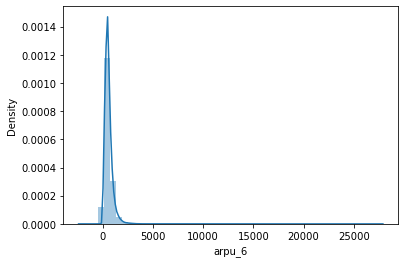

In [60]:
sns.distplot(high_val_cust.arpu_6)

count    29953.000000
mean       561.160547
std        480.028497
min      -2014.045000
25%        310.071000
50%        481.496000
75%        698.829000
max      35145.834000
Name: arpu_7, dtype: float64


<AxesSubplot:xlabel='arpu_7', ylabel='Density'>

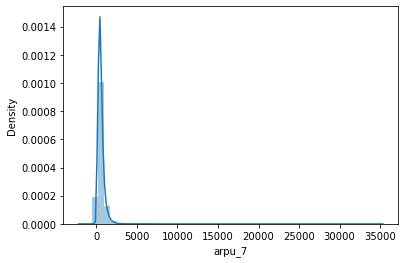

In [61]:
print(high_val_cust.arpu_7.describe())
sns.distplot(high_val_cust.arpu_7)

count    29953.000000
mean       508.890301
std        502.136278
min       -945.808000
25%        231.615000
50%        427.604000
75%        661.753000
max      33543.624000
Name: arpu_8, dtype: float64


<AxesSubplot:xlabel='arpu_8', ylabel='Density'>

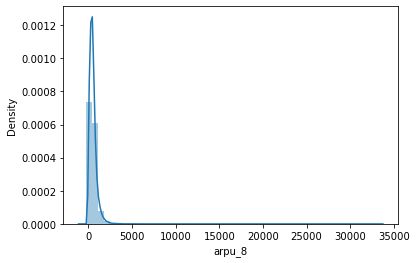

In [62]:
print(high_val_cust.arpu_8.describe())
sns.distplot(high_val_cust.arpu_8)

count    29953.000000
mean       373.800402
std        482.712621
min          0.000000
25%         71.610000
50%        222.560000
75%        487.910000
max       8362.360000
Name: offnet_mou_6, dtype: float64


<AxesSubplot:xlabel='offnet_mou_6', ylabel='Density'>

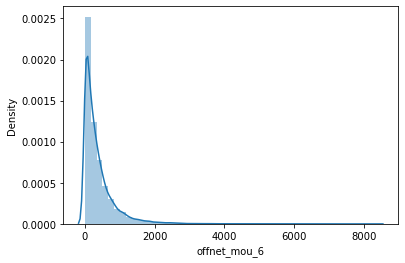

In [63]:
print(high_val_cust.offnet_mou_6.describe())
sns.distplot(high_val_cust.offnet_mou_6)

count    29953.000000
mean        26.596033
std        116.274169
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       3775.110000
Name: roam_og_mou_6, dtype: float64


<AxesSubplot:xlabel='roam_og_mou_6', ylabel='Density'>

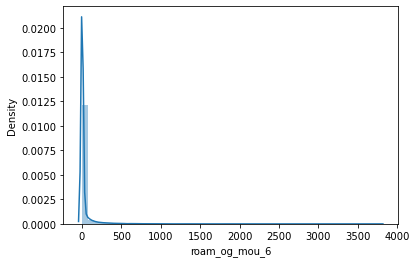

In [64]:
print(high_val_cust.roam_og_mou_6.describe())
sns.distplot(high_val_cust.roam_og_mou_6)

count    29953.000000
mean        84.574122
std        228.962993
min          0.000000
25%          4.380000
50%         24.360000
75%         78.060000
max       6431.330000
Name: loc_og_t2t_mou_6, dtype: float64


<AxesSubplot:xlabel='loc_og_t2t_mou_6', ylabel='Density'>

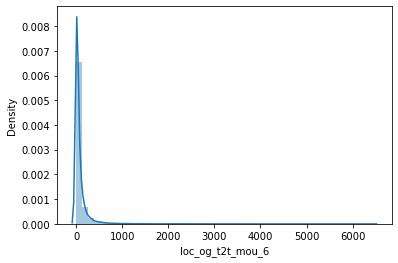

In [65]:
print(high_val_cust.loc_og_t2t_mou_6.describe())
sns.distplot(high_val_cust.loc_og_t2t_mou_6)

count    29953.000000
mean       163.309546
std        250.218928
min          0.000000
25%         19.210000
50%         77.260000
75%        209.030000
max       4729.740000
Name: loc_og_t2m_mou_6, dtype: float64


<AxesSubplot:xlabel='loc_og_t2m_mou_6', ylabel='Density'>

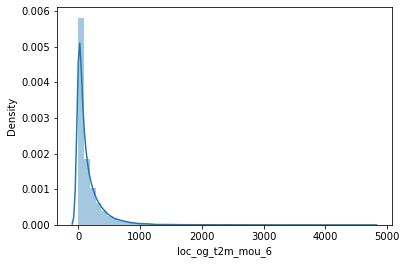

In [66]:
print(high_val_cust.loc_og_t2m_mou_6.describe())
sns.distplot(high_val_cust.loc_og_t2m_mou_6)

count    29953.000000
mean         6.348347
std         22.139546
min          0.000000
25%          0.000000
50%          0.000000
75%          4.230000
max       1466.030000
Name: loc_og_t2f_mou_6, dtype: float64


<AxesSubplot:xlabel='loc_og_t2f_mou_6', ylabel='Density'>

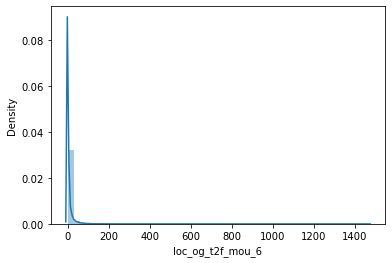

In [67]:
print(high_val_cust.loc_og_t2f_mou_6.describe())
sns.distplot(high_val_cust.loc_og_t2f_mou_6)

In [68]:
roaming_outgoing=['roam_og_mou_6','roam_og_mou_7','roam_og_mou_8']


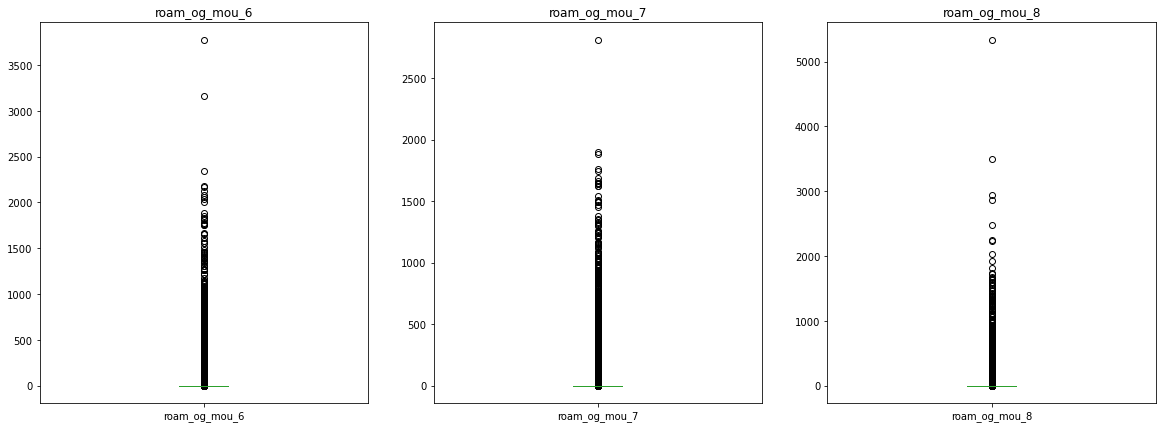

In [69]:
plt.figure(figsize=[20,7])
for i,j in enumerate(roaming_outgoing):
    plt.subplot(1,3,i+1)
    high_val_cust[j].plot.box()
    plt.title(j)
plt.show()

roaming usage shows that august month usage has reduced for sure but it should have been increased if customer is happy.


In [70]:
total_outgoing=['total_og_mou_6','total_og_mou_7','total_og_mou_8']

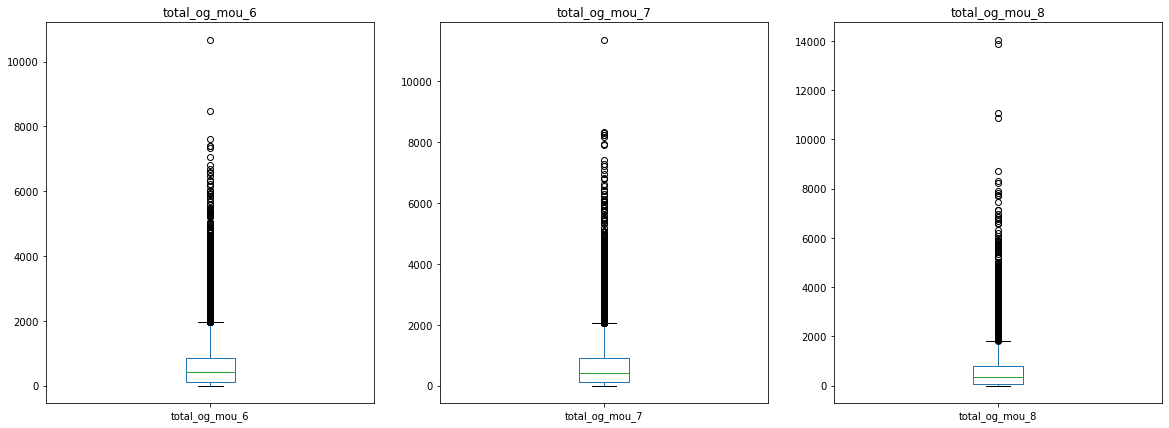

In [71]:
plt.figure(figsize=[20,7])
for i,j in enumerate(total_outgoing):
    plt.subplot(1,3,i+1)
    high_val_cust[j].plot.box()
    plt.title(j)
plt.show()

total outgoing usage shows august month usage has reduced for sure. but it should have been increased or constant if customer is happy

In [72]:
total_incoming=['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8']

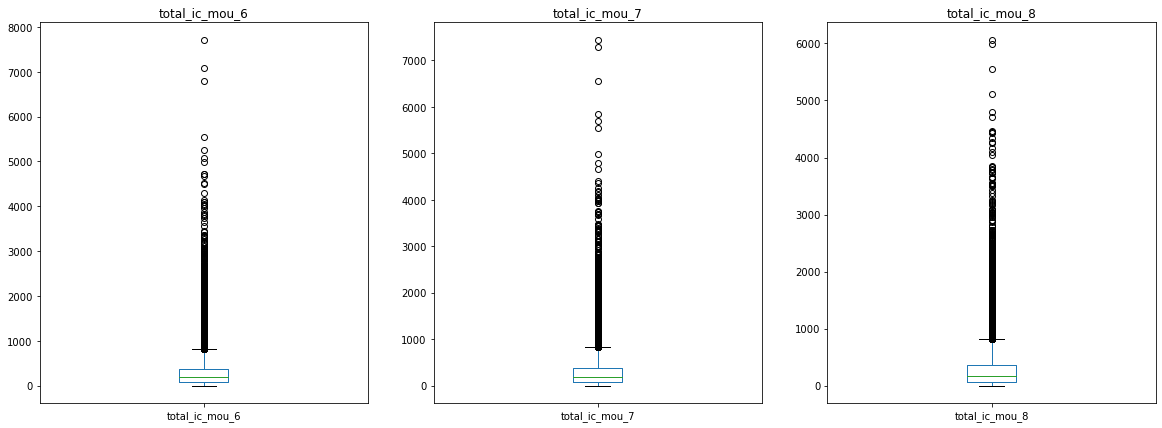

In [73]:
plt.figure(figsize=[20,7])
for i,j in enumerate(total_incoming):
    plt.subplot(1,3,i+1)
    high_val_cust[j].plot.box()
    plt.title(j)
plt.show()

total incoming usage shows august month usages has got better or constant

In [74]:
last_recharge=['last_day_rch_amt_6','last_day_rch_amt_7','last_day_rch_amt_8']

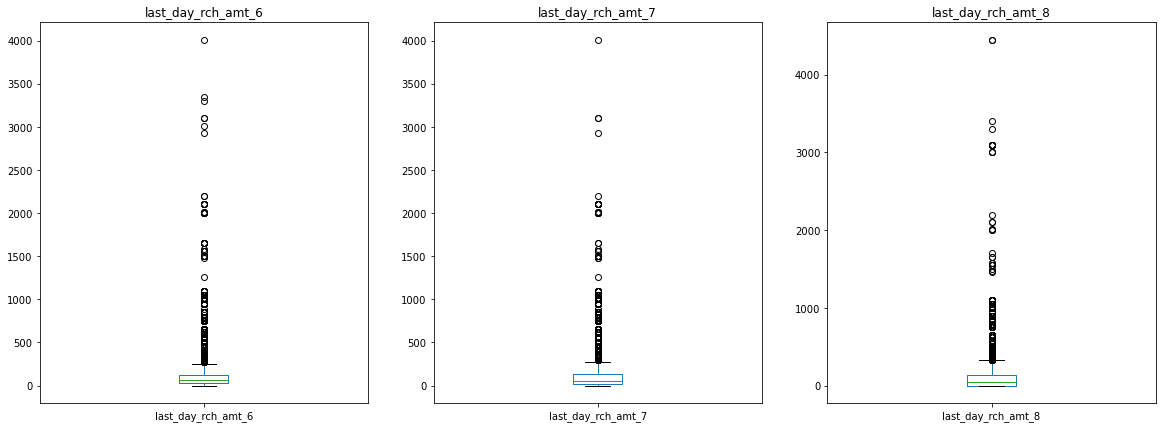

In [75]:
plt.figure(figsize=[20,7])
for i,j in enumerate(last_recharge):
    plt.subplot(1,3,i+1)
    high_val_cust[j].plot.box()
    plt.title(j)
plt.show()

recharge amount in august shows customer has reduced recharge amount for sure ,but it should have been increased or constant if customer is happy but it doesn't look that way

In [76]:
total_monthly_recharge=['total_month_rech_6','total_month_rech_7','total_month_rech_8']

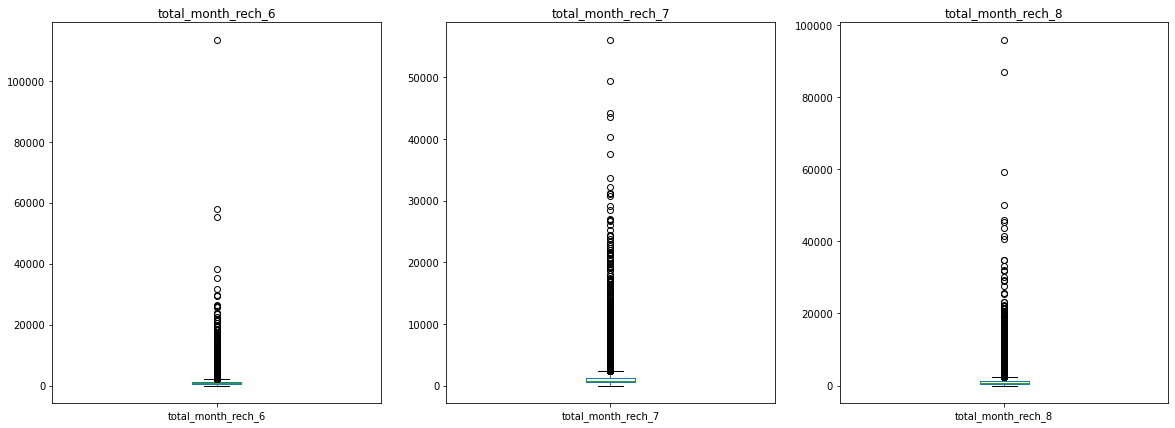

In [77]:
plt.figure(figsize=[20,7])
for i,j in enumerate(total_monthly_recharge):
    plt.subplot(1,3,i+1)
    high_val_cust[j].plot.box()
    plt.title(j)
plt.show()

total monthly recharge amount in august shows customer has reduced recharge amount ,but it should have been increased or constant if customer is happy but it doesn't look that way.

In [78]:
high_val_cust.hvplot.box('aon',title="age on network")

:BoxWhisker   (aon)

<AxesSubplot:xlabel='churn', ylabel='count'>

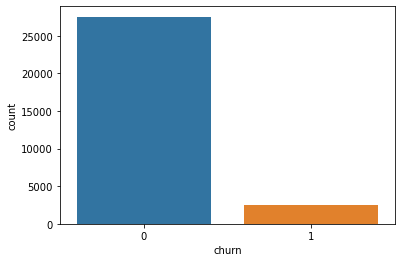

In [94]:
sns.countplot("churn",data=high_val_cust)

In [79]:
high_val_cust.groupby(['churn'])['isd_og_mou_6','isd_og_mou_7','isd_og_mou_8'].sum()

isd_og_mou_6  isd_og_mou_7  isd_og_mou_8
churn                                          
0          54563.91      55534.23      55447.61
1          10583.71       7637.07       3022.98

In [97]:
high_val_cust.groupby(['churn'])['vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8'].mean()

vol_3g_mb_6  vol_3g_mb_7  vol_3g_mb_8
churn                                       
0       350.198817   383.853492   375.182483
1       282.056272   220.009203    87.687065

In [98]:
high_val_cust.groupby(['churn'])['vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8'].mean()

vol_2g_mb_6  vol_2g_mb_7  vol_2g_mb_8
churn                                       
0       127.796845   128.214998   113.180262
1       112.114344    90.030806    23.228874

In [99]:
high_val_cust.groupby(['churn'])['std_og_mou_6','std_og_mou_7','std_og_mou_8'].mean()

std_og_mou_6  std_og_mou_7  std_og_mou_8
churn                                          
0        324.526938    353.807279    320.879212
1        603.007176    481.410875    156.169630

In [100]:
high_val_cust.groupby(['churn'])['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8'].mean()

total_ic_mou_6  total_ic_mou_7  total_ic_mou_8
churn                                                
0          295.294077      306.993108      299.218000
1          231.614612      183.280103       63.535134

In [101]:
high_val_cust.groupby(['churn'])['spl_og_mou_6','spl_og_mou_7','spl_og_mou_8'].sum()

spl_og_mou_6  spl_og_mou_7  spl_og_mou_8
churn                                          
0         156973.46     194996.87     189603.80
1          17505.08      17870.57       6559.12

In [102]:
high_val_cust.groupby(['churn'])['total_og_mou_6','total_og_mou_7','total_og_mou_8'].mean()

total_og_mou_6  total_og_mou_7  total_og_mou_8
churn                                                
0          593.996050      628.720470      582.177405
1          791.737004      628.765261      209.794521

In [103]:
high_val_cust.groupby(['churn'])['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8'].mean()

total_rech_amt_6  total_rech_amt_7  total_rech_amt_8
churn                                                      
0            649.969222        663.889971        613.977871
1            787.330867        627.459104        253.686806

In [104]:
high_val_cust.groupby(['churn'])['roam_og_mou_6','roam_og_mou_7','roam_og_mou_8'].mean()

roam_og_mou_6  roam_og_mou_7  roam_og_mou_8
churn                                             
0          24.353277      17.500751      17.781574
1          51.964168      50.179223      43.730012

In [105]:
high_val_cust.groupby(['churn'])['max_rech_amt_6','max_rech_amt_7','max_rech_amt_8'].mean()

max_rech_amt_6  max_rech_amt_7  max_rech_amt_8
churn                                                
0          169.097892      173.397711      166.827398
1          172.178792      159.655569       85.536375

In [106]:
high_val_cust.groupby(['churn'])['total_rech_num_data_6','total_rech_num_data_7','total_rech_num_data_8'].mean()

total_rech_num_data_6  total_rech_num_data_7  total_rech_num_data_8
churn                                                                     
0                   1.678561               1.903488               1.729688
1                   1.568845               1.317304               0.416358

In [107]:
high_val_cust.groupby(['churn'])['last_day_rch_amt_6','last_day_rch_amt_7','last_day_rch_amt_8'].mean()

last_day_rch_amt_6  last_day_rch_amt_7  last_day_rch_amt_8
churn                                                            
0              100.615516          102.284048           97.455015
1              104.541307           78.810522           35.752158

In [108]:
high_val_cust.groupby(['churn'])['loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2t_mou_8'].mean()

loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8
churn                                                      
0             86.762150         89.383115         83.639239
1             59.825035         44.813354         16.101500

In [109]:
high_val_cust.groupby(['churn'])['aon'].mean()

churn
0    1240.103016
1     860.643650
Name: aon, dtype: float64

### Observations


>incoming calls were reduced in action phase,
>outgoing calls were reduced in action phase,
>total recharge amount reduced in action phase,
>total data recharge reduced in action phase,
>Reuction is not just normal but significant.
>Those who churned were customers who used services for less days as compared to customers who didn't churn.
>Overall most of the services that customer was using, reduced to low in action phase

## PCA

In [110]:
hvc_copy=high_val_cust

In [111]:
hvc_copy.head()

last_date_of_month_6 last_date_of_month_7 last_date_of_month_8    arpu_6  \
0            2014-06-30           2014-07-31           2014-08-31   197.385   
7            2014-06-30           2014-07-31           2014-08-31  1069.180   
8            2014-06-30           2014-07-31           2014-08-31   378.721   
21           2014-06-30           2014-07-31           2014-08-31   514.453   
23           2014-06-30           2014-07-31           2014-08-31    74.350   

      arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0    214.816   213.803         0.00         0.00         0.00          0.00   
7   1349.850  3171.480        57.84        54.68        52.29        453.43   
8    492.223   137.362       413.69       351.03        35.08         94.66   
21   597.753   637.760       102.41       132.11        85.14        757.93   
23   193.897   366.966        48.96        50.66        33.58         85.41   

    offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0           0.00          0.00           0.00           0.00           0.00   
7         567.16        325.91          16.23          33.49          31.64   
8          80.63        136.48           0.00           0.00           0.00   
21        896.68        983.39           0.00           0.00           0.00   
23         89.36        205.89           0.00           0.00           0.00   

    roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0            0.00           0.00           0.00              0.00   
7           23.74          12.59          38.06             51.39   
8            0.00           0.00           0.00            297.13   
21           0.00           0.00           0.00              4.48   
23           0.00           0.00           0.00             48.96   

    loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0               0.00              0.00              0.00              0.00   
7              31.38             40.28            308.63            447.38   
8             217.59             12.49             80.96             70.58   
21              6.16             23.34             91.81             87.93   
23             50.66             33.58             82.94             83.01   

    loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0               0.00              0.00              0.00              0.00   
7             162.28             62.13             55.14             53.23   
8              50.54              0.00              0.00              0.00   
21            104.81              0.75              0.00              1.58   
23            148.56              0.00              0.00              0.00   

    loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0                0.0               0.0              0.00          0.00   
7                0.0               0.0              0.00        422.16   
8                0.0               0.0              7.15        378.09   
21               0.0               0.0              0.00         97.04   
23               0.0               0.0             17.71        131.91   

    loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0           0.00          0.00              0.00              0.00   
7         533.91        255.79              4.30             23.29   
8         288.18         63.04            116.56            133.43   
21         94.09        129.74             97.93            125.94   
23        133.68        182.14              0.00              0.00   

    std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  \
0               0.00              0.00              0.00              0.00   
7              12.01             49.89             31.76             49.14   
8              22.58             13.69             10.04             75.69   
21             61.79            665.36         

In [112]:
hvc_copy.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Data columns (total 167 columns):
 #    Column                 Dtype         
---   ------                 -----         
 0    last_date_of_month_6   datetime64[ns]
 1    last_date_of_month_7   datetime64[ns]
 2    last_date_of_month_8   datetime64[ns]
 3    arpu_6                 float64       
 4    arpu_7                 float64       
 5    arpu_8                 float64       
 6    onnet_mou_6            float64       
 7    onnet_mou_7            float64       
 8    onnet_mou_8            float64       
 9    offnet_mou_6           float64       
 10   offnet_mou_7           float64       
 11   offnet_mou_8           float64       
 12   roam_ic_mou_6          float64       
 13   roam_ic_mou_7          float64       
 14   roam_ic_mou_8          float64       
 15   roam_og_mou_6          float64       
 16   roam_og_mou_7          float64       
 17   roam_og_mou_8          float64       
 18   loc_

In [113]:
hvc_copy.describe()

arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7  \
count  29953.000000  29953.000000  29953.000000  29953.000000  29953.000000   
mean     558.820058    561.160547    508.890301    260.900880    268.051744   
std      460.868223    480.028497    502.136278    459.853278    480.303238   
min    -2258.709000  -2014.045000   -945.808000      0.000000      0.000000   
25%      310.142000    310.071000    231.615000     17.090000     16.040000   
50%      482.354000    481.496000    427.604000     84.640000     82.830000   
75%      700.240000    698.829000    661.753000    290.490000    290.540000   
max    27731.088000  35145.834000  33543.624000   7376.710000   8157.780000   

        onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
count  29953.000000  29953.000000  29953.000000  29953.000000   29953.000000   
mean     234.345252    373.800402    378.233106    335.123008      16.124001   
std      458.751242    482.712621    499.138982    481.985106      76.344227   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
25%       10.440000     71.610000     69.980000     46.760000       0.000000   
50%       65.660000    222.560000    220.040000    182.840000       0.000000   
75%      240.630000    487.910000    494.030000    438.860000       0.000000   
max    10752.560000   8362.360000   9667.130000  14007.340000    2613.310000   

       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
count   29953.000000   29953.000000   29953.000000   29953.000000   
mean       12.646145      12.512269      26.596033      20.155134   
std        75.833558      74.179181     116.274169      96.134144   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max      3813.290000    4169.810000    3775.110000    2812.040000   

       roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
count   29953.000000      29953.000000      29953.000000      29953.000000   
mean       19.889295         84.574122         85.762835         78.153334   
std       104.799622        228.962993        240.702116        227.540167   
min         0.000000          0.000000          0.000000          0.000000   
25%         0.000000          4.380000          4.630000          2.540000   
50%         0.000000         24.360000         24.680000         20.740000   
75%         0.000000         78.060000         78.510000         72.130000   
max      5337.040000       6431.330000       7400.660000      10752.560000   

       loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  \
count      29953.000000      29953.000000      29953.000000      29953.000000   
mean         163.309546        163.087606        151.810056          6.348347   
std          250.218928        241.683234        233.745412         22.139546   
min            0.000000          0.000000          0.000000          0.000000   
25%           19.210000         20.490000         13.130000          0.000000   
50%           77.260000         78.990000         67.790000          0.000000   
75%          209.030000        208.530000        197.030000          4.230000   
max         4729.740000       4557.140000       4961.330000       1466.030000   

       loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
count      29953.000000      29953.000000      29953.000000      29953.000000   
mean           6.426493          5.891865          1.577380          1.888737   
std           21.957189         19.516259          6.308138          9.143628   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.100000          0.0000

In [114]:
datetimecol=['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']

In [115]:
hvc_copy.drop(datetimecol, axis=1, inplace=True)

In [116]:
hvc_copy.shape

(29953, 161)

So we have droped 167-161= 6 columns

In [117]:
from sklearn.model_selection import train_test_split
X = hvc_copy.drop(['churn'], axis=1)
y = hvc_copy['churn']    
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=100)

In [118]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [119]:
# fit transform the scaler on train
X_train = scaler.fit_transform(X_train)
# transform test using the already fit scaler
X_test = scaler.transform(X_test)

### Handeling Class Imbalance

In [120]:
print("counts of label '1':",sum(y_train==1))
print("counts of label '0':",sum(y_train==0))

counts of label '1': 1752
counts of label '0': 19215


In [121]:
#perform oversampling using smote
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12)
X_train_smo, y_train_smo = sm.fit_resample(X_train, y_train)

In [122]:
#lets print stats after smote
print("counts of label '1':",sum(y_train_smo==1))
print("counts of label '0':",sum(y_train_smo==0))

counts of label '1': 19215
counts of label '0': 19215


In [123]:
from sklearn.decomposition import PCA
pca = PCA(random_state=100)

In [124]:
pca.fit(X_train_smo)

PCA(random_state=100)

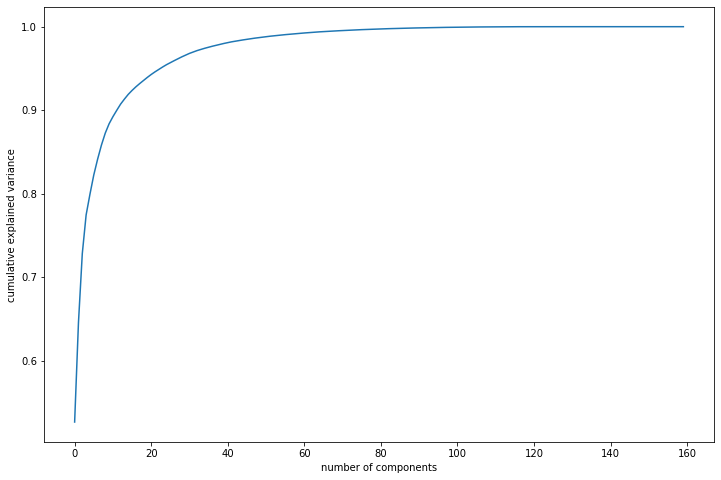

In [125]:
#lets draw screeplot in between cumulative variance and number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [126]:
from sklearn.decomposition import IncrementalPCA
pca_again = IncrementalPCA(n_components=30)

In [127]:
X_train_pca = pca_again.fit_transform(X_train_smo)
X_train_pca.shape

(38430, 30)

In [128]:
X_test_pca = pca_again.transform(X_test)
X_test_pca.shape

(8986, 30)

In [129]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
learner_pca2 = LogisticRegression(class_weight='balanced')
learner_pca2.fit(X_train_pca,y_train_smo)

LogisticRegression(class_weight='balanced')

In [130]:
dtrain_predictions = learner_pca2.predict(X_train_pca)
dtrain_predprob = learner_pca2.predict_proba(X_train_pca)[:,1]

In [131]:
print ("Accuracy :",metrics.roc_auc_score(y_train_smo, dtrain_predictions))
print ("Recall/Sensitivity :",metrics.recall_score(y_train_smo, dtrain_predictions))
print ("AUC Score (Train):",metrics.roc_auc_score(y_train_smo, dtrain_predprob))

Accuracy : 0.831615925058548
Recall/Sensitivity : 0.8472547488940931
AUC Score (Train): 0.9022054353109752


In [132]:
pred_probs_test = learner_pca2.predict(X_test_pca)
confusion = metrics.confusion_matrix(y_test, pred_probs_test)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print("Roc_auc_score :",(metrics.roc_auc_score(y_test, pred_probs_test)))
print('precision score:',(metrics.precision_score(y_test, pred_probs_test)))
print('Sensitivity/Recall :',(TP / float(TP+FN)))
print('Specificity:',(TN / float(TN+FP)))
print('False Positive Rate:',(FP/ float(TN+FP)))
print('Positive predictive value:',(TP / float(TP+FP)))
print('Negative Predictive value:',(TN / float(TN+ FN)))
print("Accuracy :",(metrics.accuracy_score(y_test,pred_probs_test)))

Roc_auc_score : 0.8172040444117931
precision score: 0.2617605961807173
Sensitivity/Recall : 0.8252569750367107
Specificity: 0.8091511137868754
False Positive Rate: 0.19084888621312462
Positive predictive value: 0.2617605961807173
Negative Predictive value: 0.9825997952917093
Accuracy : 0.810371689294458


In [133]:
#lets check with probability cutoff 0.5
y_train_pred = learner_pca2.predict_proba(X_train_pca)[:,1]
y_train_pred_final = pd.DataFrame({'Churn':y_train_smo, 'Churn_Prob':y_train_pred})
y_train_pred_final['Churn_Prob'] = y_train_pred
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Churn  Churn_Prob  predicted
0      0    0.170727          0
1      0    0.863306          1
2      0    0.224453          0
3      0    0.095104          0
4      0    0.063249          0

In [134]:
#lets define function for ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [135]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

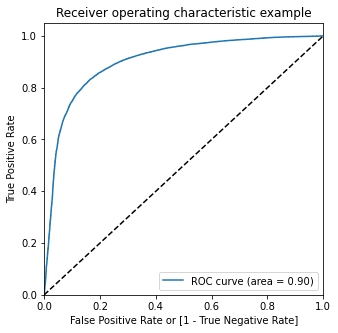

In [136]:
#lets draw roc curve
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

In [137]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Churn  Churn_Prob  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  \
0      0    0.170727          0    1    1    0    0    0    0    0    0    0   
1      0    0.863306          1    1    1    1    1    1    1    1    1    1   
2      0    0.224453          0    1    1    1    0    0    0    0    0    0   
3      0    0.095104          0    1    0    0    0    0    0    0    0    0   
4      0    0.063249          0    1    0    0    0    0    0    0    0    0   

   0.9  
0    0  
1    0  
2    0  
3    0  
4    0

In [127]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix


num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.675202  0.979131  0.371272
0.2   0.2  0.747255  0.956961  0.537549
0.3   0.3  0.792376  0.927192  0.657559
0.4   0.4  0.819100  0.891647  0.746552
0.5   0.5  0.831616  0.847255  0.815977
0.6   0.6  0.830445  0.784960  0.875930
0.7   0.7  0.813167  0.709290  0.917044
0.8   0.8  0.774317  0.598751  0.949883
0.9   0.9  0.598205  0.212959  0.983450


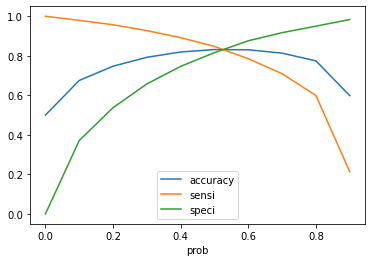

In [128]:
#lets plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

##### From the curve above, 0.45 is the optimum point to take it as a cutoff probability.

In [129]:
#apply cutoff probability
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.45 else 0)
y_train_pred_final.head()

Churn  Churn_Prob  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  \
0      0    0.170727          0    1    1    0    0    0    0    0    0    0   
1      0    0.863306          1    1    1    1    1    1    1    1    1    1   
2      0    0.224453          0    1    1    1    0    0    0    0    0    0   
3      0    0.095104          0    1    0    0    0    0    0    0    0    0   
4      0    0.063249          0    1    0    0    0    0    0    0    0    0   

   0.9  final_predicted  
0    0                0  
1    0                1  
2    0                0  
3    0                0  
4    0                0

In [130]:
#lets predict on train dataset with optimal cutoff probability
y_train_pred = learner_pca2.predict_proba(X_train_pca)[:,1]
y_train_pred_final = pd.DataFrame({'Churn':y_train_smo, 'Churn_Prob':y_train_pred})
y_train_pred_final['Churn_Prob'] = y_train_pred
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.45 else 0)
y_train_pred_final.head()

Churn  Churn_Prob  predicted
0      0    0.170727          0
1      0    0.863306          1
2      0    0.224453          0
3      0    0.095104          0
4      0    0.063249          0

In [131]:
#lets find out all scores of train dataset
#print all scores
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print("Roc_auc_score :",(metrics.roc_auc_score(y_train_pred_final.Churn, y_train_pred_final.predicted)))
print('precision score:',(metrics.precision_score(y_train_pred_final.Churn, y_train_pred_final.predicted)))
print('Sensitivity/Recall :',(TP / float(TP+FN)))
print('Specificity:',(TN / float(TN+FP)))
print('False Positive Rate:',(FP/ float(TN+FP)))
print('Positive predictive value:',(TP / float(TP+FP)))
print('Negative Predictive value:',(TN / float(TN+ FN)))

Roc_auc_score : 0.826463700234192
precision score: 0.8004310344827587
Sensitivity/Recall : 0.8697892271662764
Specificity: 0.7831381733021078
False Positive Rate: 0.21686182669789228
Positive predictive value: 0.8004310344827587
Negative Predictive value: 0.8574358974358974


In [132]:
#lets predict on test datset with optimal cutoff obtained earlier
y_test_pred = learner_pca2.predict_proba(X_test_pca)[:,1]
y_test_pred_final = pd.DataFrame({'Churn':y_test, 'Churn_Prob':y_test_pred})
y_test_pred_final['Churn_Prob'] = y_test_pred
y_test_pred_final['predicted'] = y_test_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.45 else 0)
y_test_pred_final.head()

Churn  Churn_Prob  predicted
48388      0    0.152705          0
29754      0    0.014100          0
50131      0    0.083444          0
66630      0    0.164392          0
91920      0    0.191228          0

In [133]:
#lets find out all scores of test dataset
#print all scores
confusion = metrics.confusion_matrix(y_test_pred_final.Churn, y_test_pred_final.predicted)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print("Roc_auc_score :",metrics.roc_auc_score(y_test_pred_final.Churn, y_test_pred_final.predicted))
print('precision score :',(metrics.precision_score(y_test_pred_final.Churn, y_test_pred_final.predicted)))
print('Sensitivity/Recall :',(TP / float(TP+FN)))
print('Specificity:',(TN / float(TN+FP)))
print('False Positive Rate:',(FP/ float(TN+FP)))
print('Positive predictive value:',(TP / float(TP+FP)))
print('Negative Predictive value:',(TN / float(TN+ FN)))

Roc_auc_score : 0.81412794691378
precision score : 0.23639317627944761
Sensitivity/Recall : 0.8546255506607929
Specificity: 0.773630343166767
False Positive Rate: 0.22636965683323299
Positive predictive value: 0.23639317627944761
Negative Predictive value: 0.9848252605763336


As you can see above stats with logistics regression on Test Dataset is:

Sensitivity/Recall : 0.8546255506607929
Specificity: 0.773630343166767

Stats On Train dataset was:

Sensitivity/Recall : 0.8697892271662764
Specificity: 0.7831381733021078

### Random Forest

In [124]:
# GridSearchCV to find optimal n_estimators
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(10, 30, 5)}
rf = RandomForestClassifier()

# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                 return_train_score=True)
rf.fit(X_train_pca, y_train_smo)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(10, 30, 5)},
             return_train_score=True, scoring='accuracy')

In [125]:
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      15.677935      0.387802         0.153190        0.005447   
1      19.606789      0.321517         0.191492        0.008993   
2      21.376934      0.273245         0.206839        0.002044   
3      22.526776      0.300894         0.222420        0.009256   

  param_max_depth             params  split0_test_score  split1_test_score  \
0              10  {'max_depth': 10}           0.886937           0.891491   
1              15  {'max_depth': 15}           0.932084           0.934036   
2              20  {'max_depth': 20}           0.943143           0.945225   
3              25  {'max_depth': 25}           0.944444           0.943534   

   split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0           0.896825           0.885896           0.888368         0.889904   
1           0.937809           0.934686           0.927791         0.933281   
2           0.947177           0.945615           0.940281         0.944288   
3           0.950820           0.946396           0.942363         0.945511   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.003941                4            0.921578            0.918748   
1        0.003305                3            0.979638            0.978793   
2        0.002381                2            0.991608            0.991641   
3        0.002964                1            0.997756            0.997463   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.916927            0.916114            0.916634   
1            0.978890            0.979508            0.978240   
2            0.991315            0.992421            0.991933   
3            0.997983            0.997983            0.998309   

   mean_train_score  std_train_score  
0          0.918000         0.001997  
1          0.979014         0.000509  
2          0.991784         0.000374  
3          0.997899         0.000280

#### Controlling MAX_DEPTH 

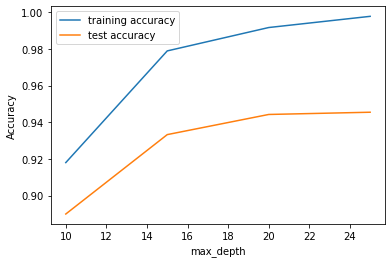

In [126]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Max_depth =20 will be good for the model

with the increment of depth the Accuracy increases to a certain point after it it remains constant but the model will overfit so by resricting to a depth of 20 will reduce the overfitting problem

#### Controlling max_features

In [127]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

n_folds = 5
parameters = {'max_features': [4, 8, 14, 20, 24]}
rf = RandomForestClassifier(max_depth=20,n_estimators=80)
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(X_train_pca, y_train_smo)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=20, n_estimators=80),
             param_grid={'max_features': [4, 8, 14, 20, 24]},
             return_train_score=True, scoring='accuracy')

In [128]:
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       7.725154      0.038528         0.093149        0.001018   
1      15.017266      0.055376         0.091164        0.000513   
2      26.148710      0.262439         0.090541        0.001705   
3      37.656912      0.341088         0.092349        0.003702   
4      45.181732      0.444177         0.090964        0.003192   

  param_max_features                params  split0_test_score  \
0                  4   {'max_features': 4}           0.939500   
1                  8   {'max_features': 8}           0.940671   
2                 14  {'max_features': 14}           0.939110   
3                 20  {'max_features': 20}           0.938590   
4                 24  {'max_features': 24}           0.936508   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.943013           0.948218           0.942883           0.939110   
1           0.944314           0.944314           0.945225           0.940021   
2           0.939891           0.946656           0.944314           0.939630   
3           0.938980           0.942233           0.941322           0.937679   
4           0.936118           0.940671           0.940801           0.935857   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.942545        0.003274                2            0.992486   
1         0.942909        0.002129                1            0.990567   
2         0.941920        0.003014                3            0.989689   
3         0.939761        0.001724                4            0.989201   
4         0.937991        0.002251                5            0.989169   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.992194            0.992421            0.992714   
1            0.991055            0.990925            0.991413   
2            0.989331            0.989624            0.989917   
3            0.989331            0.988908            0.990405   
4            0.988843            0.989169            0.989234   

   split4_train_score  mean_train_score  std_train_score  
0            0.992161          0.992395         0.000203  
1            0.991445          0.991081         0.000326  
2            0.990372          0.989787         0.000347  
3            0.989884          0.989546         0.000534  
4            0.989071          0.989097         0.000137

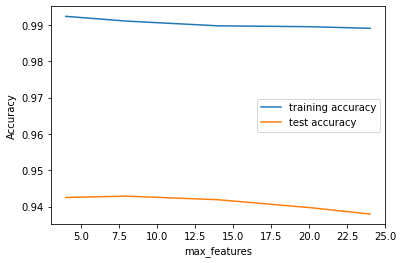

In [129]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

max_features=5

### Controlling min_samples_leaf

In [130]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
n_folds = 5
parameters = {'min_samples_leaf': range(100, 400, 50)}
rf = RandomForestClassifier(max_depth=20,n_estimators=80,max_features=5)
# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(X_train_pca, y_train_smo)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=20, max_features=5,
                                              n_estimators=80),
             param_grid={'min_samples_leaf': range(100, 400, 50)},
             return_train_score=True, scoring='accuracy')

In [131]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       6.860043      0.110490         0.068225        0.003073   
1       6.188853      0.263270         0.066023        0.004246   
2       5.407548      0.083413         0.055253        0.000489   
3       5.204876      0.100675         0.055462        0.003069   
4       5.211293      0.276456         0.053244        0.002247   

  param_min_samples_leaf                     params  split0_test_score  \
0                    100  {'min_samples_leaf': 100}           0.842571   
1                    150  {'min_samples_leaf': 150}           0.833463   
2                    200  {'min_samples_leaf': 200}           0.827088   
3                    250  {'min_samples_leaf': 250}           0.821494   
4                    300  {'min_samples_leaf': 300}           0.812516   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.850898           0.858834           0.844783           0.848816   
1           0.842050           0.848296           0.834114           0.840359   
2           0.836456           0.843091           0.828259           0.832813   
3           0.832032           0.838017           0.820453           0.826177   
4           0.820843           0.829560           0.812646           0.824486   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.849180        0.005645                1            0.862770   
1         0.839657        0.005476                2            0.850377   
2         0.833542        0.005827                3            0.843937   
3         0.827635        0.006611                4            0.833724   
4         0.820010        0.006668                5            0.826730   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.859778            0.860623            0.860818   
1            0.847613            0.846246            0.848361   
2            0.838180            0.838668            0.841693   
3            0.833236            0.832000            0.834472   
4            0.823543            0.826015            0.825007   

   split4_train_score  mean_train_score  std_train_score  
0            0.859810          0.860760         0.001089  
1            0.848133          0.848146         0.001336  
2            0.839546          0.840405         0.002137  
3            0.831024          0.832891         0.001232  
4            0.827739          0.825807         0.001442

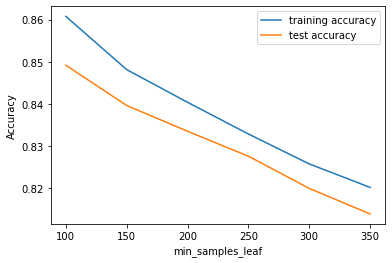

In [132]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

min_sample_leaf=100

accuracy decreases from the 100 th samples_leaf

####  n_estimators

In [134]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
n_folds = 5
parameters = {'n_estimators': range(50, 150, 25)}
rf = RandomForestClassifier(max_depth=20)
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(X_train_pca, y_train_smo)

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=20),
             param_grid={'n_estimators': range(50, 150, 25)},
             return_train_score=True, scoring='accuracy')

In [135]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       6.194387      0.160805         0.060636        0.004109   
1       9.242891      0.105302         0.091163        0.005561   
2      12.021144      0.184095         0.114891        0.000982   
3      14.907339      0.103899         0.143823        0.001173   

  param_n_estimators                 params  split0_test_score  \
0                 50   {'n_estimators': 50}           0.942233   
1                 75   {'n_estimators': 75}           0.940671   
2                100  {'n_estimators': 100}           0.940541   
3                125  {'n_estimators': 125}           0.944314   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.941842           0.944184           0.944054           0.938329   
1           0.945485           0.945746           0.944835           0.941192   
2           0.943013           0.946266           0.943273           0.938980   
3           0.942753           0.945876           0.942883           0.940932   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.942129        0.002119                4            0.991608   
1         0.943586        0.002194                1            0.992194   
2         0.942415        0.002499                3            0.992063   
3         0.943352        0.001657                2            0.992194   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.991283            0.992096            0.991608   
1            0.991478            0.992031            0.992291   
2            0.991576            0.991771            0.992031   
3            0.991283            0.992421            0.991933   

   split4_train_score  mean_train_score  std_train_score  
0            0.991803          0.991680         0.000267  
1            0.992324          0.992063         0.000310  
2            0.992519          0.991992         0.000318  
3            0.992259          0.992018         0.000400

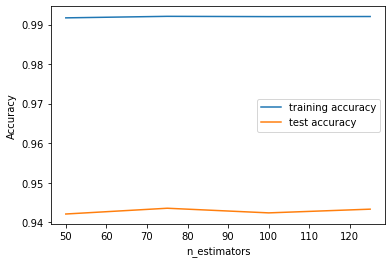

In [136]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

n_estimators=75 

test accuracy increases till 75 and then remain constant

### min_samples_split

In [137]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
n_folds = 5
parameters = {'min_samples_split': range(50, 300, 50)}
rf = RandomForestClassifier(max_depth=20,n_estimators=80,max_features=5,min_samples_leaf=100)
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(X_train_pca, y_train_smo)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=20, max_features=5,
                                              min_samples_leaf=100,
                                              n_estimators=80),
             param_grid={'min_samples_split': range(50, 300, 50)},
             return_train_score=True, scoring='accuracy')

In [138]:
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       6.510601      0.209575         0.065027        0.003478   
1       6.385333      0.105038         0.064435        0.001359   
2       6.442375      0.184386         0.065425        0.002570   
3       6.313932      0.056374         0.063824        0.000905   
4       6.712877      0.228236         0.070800        0.012800   

  param_min_samples_split                      params  split0_test_score  \
0                      50   {'min_samples_split': 50}           0.844002   
1                     100  {'min_samples_split': 100}           0.845043   
2                     150  {'min_samples_split': 150}           0.841920   
3                     200  {'min_samples_split': 200}           0.842701   
4                     250  {'min_samples_split': 250}           0.841530   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.849857           0.858834           0.845563           0.850117   
1           0.847775           0.857143           0.842961           0.846995   
2           0.850247           0.857273           0.845303           0.850117   
3           0.849597           0.859225           0.845563           0.849467   
4           0.846344           0.854801           0.842311           0.845173   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.849675        0.005162                1            0.863486   
1         0.847983        0.004874                4            0.860591   
2         0.848972        0.005197                3            0.861762   
3         0.849310        0.005588                2            0.859940   
4         0.846032        0.004730                5            0.858314   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.858737            0.858964            0.860981   
1            0.859029            0.859257            0.859322   
2            0.858119            0.859257            0.860948   
3            0.859485            0.860428            0.861144   
4            0.855094            0.857371            0.858737   

   split4_train_score  mean_train_score  std_train_score  
0            0.858802          0.860194         0.001845  
1            0.859712          0.859582         0.000550  
2            0.859517          0.859921         0.001288  
3            0.858119          0.859823         0.001014  
4            0.854801          0.856863         0.001628

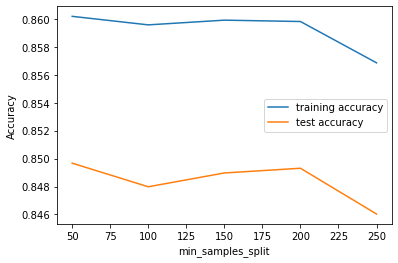

In [139]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

min_samples_split=100


## Final Model

In [181]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=20,
                             min_samples_leaf=100, 
                             min_samples_split=100,
                             max_features=5,
                             n_estimators=75,
                             random_state=10,
                             bootstrap=True)

In [182]:
rf_pca=rfc.fit(X_train_pca,y_train_smo)

In [183]:
rtrain_predictions = rf_pca.predict(X_train_pca)
rtrain_predprob = rf_pca.predict_proba(X_train_pca)[:,1]

In [184]:
#lets print some scores
print ("Accuracy :",metrics.roc_auc_score(y_train_smo, rtrain_predictions))
print ("Recall/Sensitivity :",metrics.recall_score(y_train_smo, rtrain_predictions))
print ("AUC Score (Train):",metrics.roc_auc_score(y_train_smo, rtrain_predprob))


Accuracy : 0.8650533437418683
Recall/Sensitivity : 0.8615664845173042
AUC Score (Train): 0.9383156170886044


In [185]:
#lets predict on test dataset
pred_probs_test = rf_pca.predict(X_test_pca)
confusion = metrics.confusion_matrix(y_test, pred_probs_test)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print("Roc_auc_score :",(metrics.roc_auc_score(y_test, pred_probs_test)))
print('precision score:',(metrics.precision_score(y_test, pred_probs_test)))
print('Sensitivity/Recall :',(TP / float(TP+FN)))
print('Specificity:',(TN / float(TN+FP)))
print('False Positive Rate:',(FP/ float(TN+FP)))
print('Positive predictive value:',(TP / float(TP+FP)))
print('Negative Predictive value:',(TN / float(TN+ FN)))
print("Accuracy :",(metrics.accuracy_score(y_test,pred_probs_test)))

Roc_auc_score : 0.8130965105146044
precision score: 0.3039953676896352
Sensitivity/Recall : 0.7709251101321586
Specificity: 0.85526791089705
False Positive Rate: 0.14473208910295002
Positive predictive value: 0.3039953676896352
Negative Predictive value: 0.9785094365615099
Accuracy : 0.8488760293790341


In [186]:
#lets check with probability cutoff 0.5
y_train_predrf = rf_pca.predict_proba(X_train_pca)[:,1]
y_train_predrf_final = pd.DataFrame({'Churn':y_train_smo, 'Churn_Prob':y_train_predrf})
y_train_predrf_final['Churn_Prob'] = y_train_predrf
y_train_predrf_final['predicted'] = y_train_predrf_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_predrf_final.head()

Churn  Churn_Prob  predicted
0      0    0.228934          0
1      0    0.891661          1
2      0    0.163589          0
3      0    0.217467          0
4      0    0.056141          0

In [187]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_predrf_final[i]= y_train_predrf_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_predrf_final.head()

Churn  Churn_Prob  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  \
0      0    0.228934          0    1    1    1    0    0    0    0    0    0   
1      0    0.891661          1    1    1    1    1    1    1    1    1    1   
2      0    0.163589          0    1    1    0    0    0    0    0    0    0   
3      0    0.217467          0    1    1    1    0    0    0    0    0    0   
4      0    0.056141          0    1    0    0    0    0    0    0    0    0   

   0.9  
0    0  
1    0  
2    0  
3    0  
4    0

In [188]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_predrf_final.Churn, y_train_predrf_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.592037  0.999948  0.184127
0.2   0.2  0.724252  0.994848  0.453656
0.3   0.3  0.809446  0.964507  0.654385
0.4   0.4  0.853318  0.921416  0.785220
0.5   0.5  0.865053  0.861566  0.868540
0.6   0.6  0.849857  0.778871  0.920843
0.7   0.7  0.800859  0.644444  0.957273
0.8   0.8  0.723003  0.462868  0.983138
0.9   0.9  0.590710  0.183294  0.998126


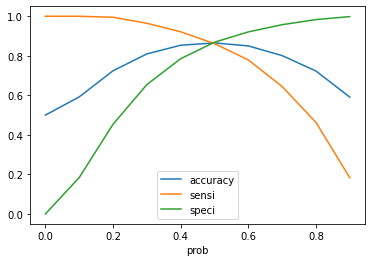

In [189]:
#lets plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the curve above, 0.45 is the optimum point to take it as a cutoff probability

In [190]:
#apply cutoff probability
y_train_predrf_final['final_predicted'] = y_train_predrf_final.Churn_Prob.map( lambda x: 1 if x > 0.45 else 0)
#lets predict on train dataset with optimal cutoff probability
y_train_predrf = rf_pca.predict_proba(X_train_pca)[:,1]
y_train_predrf_final = pd.DataFrame({'Churn':y_train_smo, 'Churn_Prob':y_train_predrf})
y_train_predrf_final['Churn_Prob'] = y_train_predrf
y_train_predrf_final['predicted'] = y_train_predrf_final.Churn_Prob.map(lambda x: 1 if x > 0.45 else 0)
y_train_predrf_final.head()

Churn  Churn_Prob  predicted
0      0    0.228934          0
1      0    0.891661          1
2      0    0.163589          0
3      0    0.217467          0
4      0    0.056141          0

In [191]:
#lets find out all scores of train dataset
confusion = metrics.confusion_matrix(y_train_predrf_final.Churn, y_train_predrf_final.predicted)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print("Roc_auc_score :",(metrics.roc_auc_score(y_train_predrf_final.Churn, y_train_predrf_final.predicted)))
print('precision score:',(metrics.precision_score(y_train_predrf_final.Churn, y_train_predrf_final.predicted)))
print('Sensitivity/Recall :',(TP / float(TP+FN)))
print('Specificity:',(TN / float(TN+FP)))
print('False Positive Rate:',(FP/ float(TN+FP)))
print('Positive predictive value:',(TP / float(TP+FP)))
print('Negative Predictive value:',(TN / float(TN+ FN)))

Roc_auc_score : 0.8623731459797033
precision score: 0.8415914442700158
Sensitivity/Recall : 0.8927920895134009
Specificity: 0.8319542024460057
False Positive Rate: 0.16804579755399426
Positive predictive value: 0.8415914442700158
Negative Predictive value: 0.8858472791754406


In [192]:
#lets predict on test datset with optimal cutoff obtained earlier
y_test_predrf = rf_pca.predict_proba(X_test_pca)[:,1]
y_test_predrf_final = pd.DataFrame({'Churn':y_test, 'Churn_Prob':y_test_predrf})
y_test_predrf_final['Churn_Prob'] = y_test_predrf
y_test_predrf_final['predicted'] = y_test_predrf_final.Churn_Prob.map(lambda x: 1 if x > 0.45 else 0)
y_test_predrf_final.head()

Churn  Churn_Prob  predicted
48388      0    0.202205          0
29754      0    0.076664          0
50131      0    0.154517          0
66630      0    0.302960          0
91920      0    0.447601          0

In [193]:
#lets find out all scores of test dataset
confusion = metrics.confusion_matrix(y_test_predrf_final.Churn, y_test_predrf_final.predicted)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print("Roc_auc_score :",metrics.roc_auc_score(y_test_predrf_final.Churn, y_test_predrf_final.predicted))
print('precision score :',(metrics.precision_score(y_test_predrf_final.Churn, y_test_predrf_final.predicted)))
print('Sensitivity/Recall :',(TP / float(TP+FN)))
print('Specificity:',(TN / float(TN+FP)))
print('False Positive Rate:',(FP/ float(TN+FP)))
print('Positive predictive value:',(TP / float(TP+FP)))
print('Negative Predictive value:',(TN / float(TN+ FN)))

Roc_auc_score : 0.8149426110449538
precision score : 0.2664742664742665
Sensitivity/Recall : 0.8135095447870778
Specificity: 0.8163756773028297
False Positive Rate: 0.18362432269717038
Positive predictive value: 0.2664742664742665
Negative Predictive value: 0.9816128565223686


### Train and test Recall score of Random forest:
##### Train Sensitivity/Recall: 0.8927920895134009
##### Test Sensitivity/Recall:0.8135095447870778

### Train and test Recall score of Logistic Regression :
##### Train Sensitivity/Recall: 0.8697892271662764
##### Test Sensitivity/Recall: 0.8546255506607929
   

In [6]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=20,
                             min_samples_leaf=100, 
                             min_samples_split=100,
                             max_features=5,
                             n_estimators=75,
                             random_state=10,
                             bootstrap=True)

In [134]:
rfc.fit(X_train_smo,y_train_smo)

RandomForestClassifier(max_depth=20, max_features=5, min_samples_leaf=100,
                       min_samples_split=100, n_estimators=75, random_state=10)

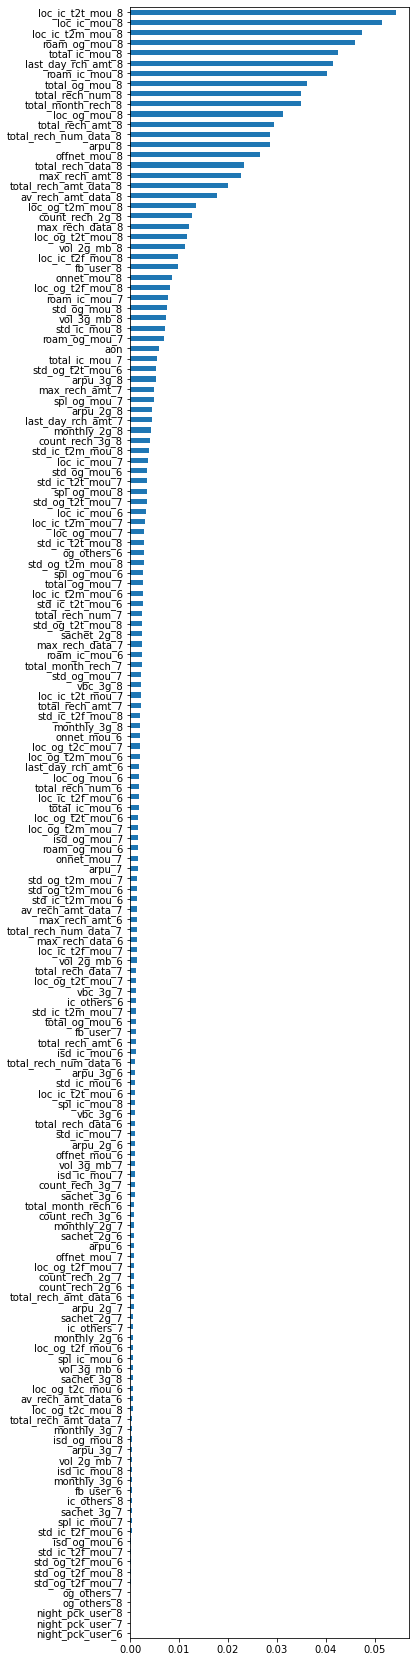

In [143]:
plt.figure(figsize=(5,30))
impo_features = pd.Series(rfc.feature_importances_, index=X.columns)
impo_features.sort_values().plot(kind='barh', align='center')
plt.show()

## Final Observation

###### From this bar plot  we can determine the following:
######    loc_ic_t2t_mou_8 or local incoming call within same operator in August month is the most important feature among all the features
######    loc_ic_mou_8 or local incoming call minuits of uses in August month is the second prior feature among all
######    loc_ic_t2m_mou_8 or local incoming calls operator T to other in August month  is the third prior feature
######    roam_og_mou_8 or roaming outgoing minuits of uses in August month is the foth prior feature
######    night_pck_user_8 or night pack user in july and night_pck_user_6 or night pack user in june are the least important features

### So we can conclude that: 
1. if the incoming and outgoing call is reduced month by month then the customer has a tendency of swithing to another operator
2. if the customer is using internet data before and then stops to buy it in recent time then there is a probability of churning to other network
3. if the customer will nor recharge for 2 to 3 months then there is a probability of churning
4. the 3rd point is due to the increment recharge plans or due to the network issues.
#### to overcome from these we can follow some investigations and take some important measures:
1. Give some plan benifits or gift vouchers to the high value customers
2. we can check the competitors data and recharge plans and make some decisions that how we can reschedules our plans
3. The network is one of the most important thing for which people are churning , We should interact with network maintanance depertment so that the customers won't experience any disturbances  
 

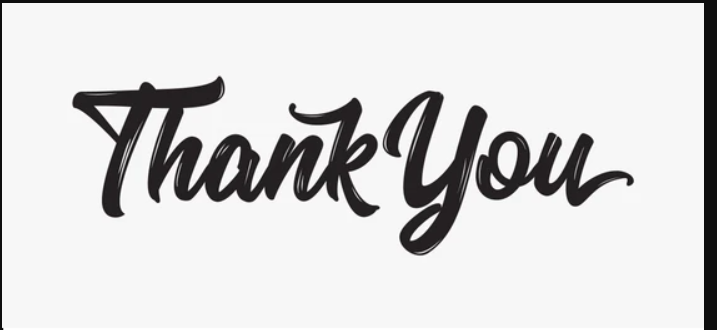